# First Deep Learning Project in Python with Keras

The steps we are going to cover:
1. Load Data.
2. Define Keras Model.
3. Compile Keras Model.
4. Fit Keras Model.
5. Evaluate Keras Model.
6. Put It All Together.
7. Make Predictions

## Load Data
    

Download the dataset and place it in your local working directory, the same location as your python file. Take a look at the dataset:

In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/housepricedata.csv')

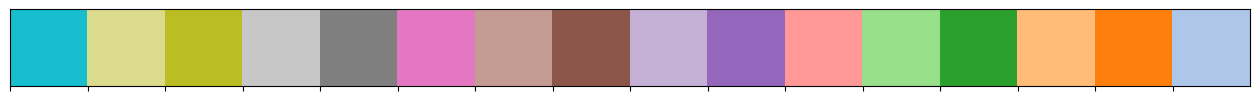

In [123]:
colors = sns.color_palette("tab20_r", 16)
sns.palplot(colors)
sns.set_style("darkgrid")

Here, you can explore the data a little. We have our input features in the first ten columns:

- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:
- Is the house price above the median or not? (1 for yes and 0 for no)

In [2]:
df.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
df.shape

(1460, 11)

Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

In [5]:
dataset = df.values

Split the dataset into input features (X) and the feature we wish to predict (Y). To do that split, assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y

In [6]:
X = dataset[:,0:10]
y = dataset[:,10]

Now, we want to split our dataset into a training set, a validation set and a test set. These are the dimensions you need to get for your train, validation and test datasets: (1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [9]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [10]:
print("--------------------------------------------")
print("--> SHAPE OBTAINED <--")
print(f"X_train shape --> {X_train.shape}")
print(f"X_test shape ---> {X_test.shape}")
print(f"X_val shape ----> {X_val.shape}")
print("--------------------------------------------")

--------------------------------------------
--> SHAPE OBTAINED <--
X_train shape --> (1022, 10)
X_test shape ---> (219, 10)
X_val shape ----> (219, 10)
--------------------------------------------


Feature scaling will help us see all the variables from the same scale, it will also help our models learn faster

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [12]:
print("--> AFTER SCALING <--")
print("-------------------------------------------")
print(f"X_train SCALED --> {X_train}")
print("-------------------------------------------")
print(f"X_test SCALED --> {X_test}")

--> AFTER SCALING <--
-------------------------------------------
X_train SCALED --> [[-0.03050433  0.63603069  0.39226602 ...  0.27923396  0.59424033
   0.25381261]
 [-0.62436478 -0.82305655 -0.50862358 ... -0.94819445 -0.9432625
   0.22981353]
 [-0.18592357  0.63603069 -0.50862358 ...  0.27923396 -0.9432625
   0.65699721]
 ...
 [-0.22725096 -0.82305655  1.29315563 ... -0.94819445 -0.9432625
   0.45540491]
 [-0.27405334  0.63603069  2.19404524 ...  0.27923396  0.59424033
  -1.25332981]
 [-0.62357003  0.63603069 -0.50862358 ...  0.27923396  0.59424033
   0.87778877]]
-------------------------------------------
X_test SCALED --> [[-0.00489547 -0.82305655  1.29315563 ... -0.33448024 -0.9432625
  -0.04377602]
 [ 0.0030521  -0.82305655 -0.50862358 ... -0.33448024 -0.9432625
   0.47460418]
 [ 0.13233265  1.36557431 -0.50862358 ...  2.12037656  2.13174316
   1.30497245]
 ...
 [ 0.02504039 -0.09351293  1.29315563 ...  1.50666236  0.59424033
   0.68099629]
 [-0.23140136  0.63603069  0.39226602

# Define Keras Model.

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:
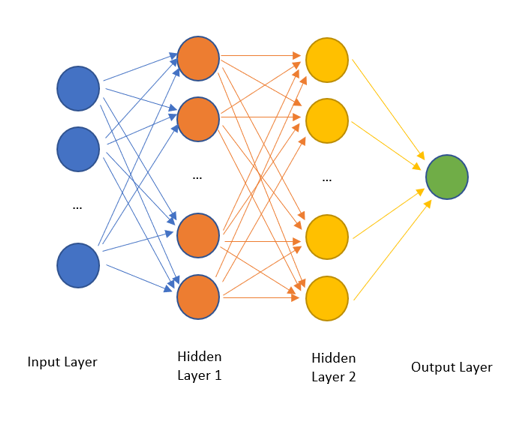
In words, we want to have these layers:

- Hidden layer 1: 12 neurons, ReLU activation
- Hidden layer 2: 16 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation
    
Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.

In [87]:
# Dependencies
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

## Model n°1 -- MSE

### --> Definition

In [89]:
def init_model():
    # Initialisation du modèle
    model = Sequential()
    # On ajoute des layers de neurones
    # A dense layer is a type of layer in which each neuron or node is connected to every neuron in the previous layer, 
    # resulting in a fully connected network.
    model.add(Dense(12, activation='relu', input_dim=10))
    model.add(Dense(16, activation='relu'))
    # La dernière layer est sensé nou
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [90]:
# Initialisation du modèle
model = Sequential()
# On ajoute des layers de neurones
# A dense layer is a type of layer in which each neuron or node is connected to every neuron in the previous layer, 
# resulting in a fully connected network.
model.add(Dense(12, activation='relu', input_dim=10))
model.add(Dense(16, activation='relu'))
# La dernière layer est sensé nou
model.add(Dense(1, activation='sigmoid'))

Now that the model is defined, we can compile it.

Compiling the model uses TensorFlow that chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

In [104]:
# compile model
model = init_model()
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy', 'mse'])

### --> Specifications

In [105]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                132       
                                                                 
 dense_13 (Dense)            (None, 16)                208       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


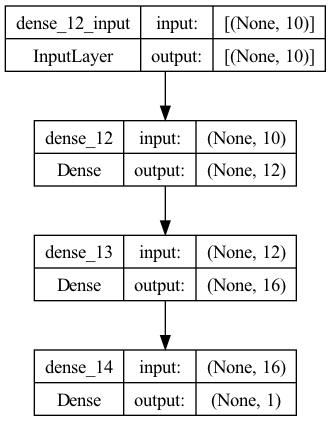

In [106]:
from keras import utils
dot_img_file = '/tmp/model_1.png'
utils.plot_model(model, to_file=dot_img_file, show_shapes=True, show_layer_names=True)

### --> Prediction n°1

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data (use 100 iterations and 32 batch size).

In [107]:
def evaluate(modelEval, ):
    with tf.device('/CPU:0'):
        history = modelEval.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, validation_data=(X_val, y_val))
    return history

In [108]:
history = evaluate(model)

Epoch 1/100


2023-05-24 09:58:27.906782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 - 0s - loss: 0.3010 - accuracy: 0.3963 - mse: 0.3010 - val_loss: 0.2998 - val_accuracy: 0.3470 - val_mse: 0.2998 - 498ms/epoch - 16ms/step
Epoch 2/100


2023-05-24 09:58:28.176747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 - 0s - loss: 0.2841 - accuracy: 0.4315 - mse: 0.2841 - val_loss: 0.2814 - val_accuracy: 0.4110 - val_mse: 0.2814 - 191ms/epoch - 6ms/step
Epoch 3/100
32/32 - 0s - loss: 0.2690 - accuracy: 0.4746 - mse: 0.2690 - val_loss: 0.2660 - val_accuracy: 0.4658 - val_mse: 0.2660 - 191ms/epoch - 6ms/step
Epoch 4/100
32/32 - 0s - loss: 0.2556 - accuracy: 0.5176 - mse: 0.2556 - val_loss: 0.2524 - val_accuracy: 0.5297 - val_mse: 0.2524 - 189ms/epoch - 6ms/step
Epoch 5/100
32/32 - 0s - loss: 0.2440 - accuracy: 0.5607 - mse: 0.2440 - val_loss: 0.2403 - val_accuracy: 0.5936 - val_mse: 0.2403 - 189ms/epoch - 6ms/step
Epoch 6/100
32/32 - 0s - loss: 0.2338 - accuracy: 0.6018 - mse: 0.2338 - val_loss: 0.2295 - val_accuracy: 0.6438 - val_mse: 0.2295 - 194ms/epoch - 6ms/step
Epoch 7/100
32/32 - 0s - loss: 0.2248 - accuracy: 0.6262 - mse: 0.2248 - val_loss: 0.2197 - val_accuracy: 0.6667 - val_mse: 0.2197 - 186ms/epoch - 6ms/step
Epoch 8/100
32/32 - 0s - loss: 0.2165 - accuracy: 0.6536 - mse: 0.2165 - val

Epoch 55/100
32/32 - 0s - loss: 0.0932 - accuracy: 0.8738 - mse: 0.0932 - val_loss: 0.0846 - val_accuracy: 0.8858 - val_mse: 0.0846 - 188ms/epoch - 6ms/step
Epoch 56/100
32/32 - 0s - loss: 0.0925 - accuracy: 0.8738 - mse: 0.0925 - val_loss: 0.0841 - val_accuracy: 0.8858 - val_mse: 0.0841 - 186ms/epoch - 6ms/step
Epoch 57/100
32/32 - 0s - loss: 0.0919 - accuracy: 0.8738 - mse: 0.0919 - val_loss: 0.0835 - val_accuracy: 0.8813 - val_mse: 0.0835 - 184ms/epoch - 6ms/step
Epoch 58/100
32/32 - 0s - loss: 0.0914 - accuracy: 0.8748 - mse: 0.0914 - val_loss: 0.0829 - val_accuracy: 0.8813 - val_mse: 0.0829 - 184ms/epoch - 6ms/step
Epoch 59/100
32/32 - 0s - loss: 0.0909 - accuracy: 0.8748 - mse: 0.0909 - val_loss: 0.0824 - val_accuracy: 0.8813 - val_mse: 0.0824 - 183ms/epoch - 6ms/step
Epoch 60/100
32/32 - 0s - loss: 0.0903 - accuracy: 0.8757 - mse: 0.0903 - val_loss: 0.0820 - val_accuracy: 0.8813 - val_mse: 0.0820 - 178ms/epoch - 6ms/step
Epoch 61/100
32/32 - 0s - loss: 0.0899 - accuracy: 0.8757 

In [109]:
y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [111]:
y_val_predict = model.predict(X_val)
y_val_predict = np.round(y_val_predict)
#y_val_predict = y_val_predict.ravel()
y_val_predict

7/7 [==============================] - 0s 4ms/step


array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],

## Evalutation of Model n°1

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

accuracy = accuracy_score(y_val, y_val_predict)
print(f"Accuracy score: {accuracy}")

mse = mean_squared_error(y_val, y_val_predict)
print(f"Mean Squared Error (MSE): {mse}")

Accuracy score: 0.8995433789954338
Mean Squared Error (MSE): 0.1004566210045662


We have trained our model, which gives us a correct accuracy. But we haven't used our validation set properly, and our test set at all. Let's correct that.

In [113]:
# train model


In [114]:
# predict on TEST set


# calculate accuracy on test set


Visualize training and validation losses and accuracies plots with the help of keras

In [115]:
for key in history.history:
    print(key)

loss
accuracy
mse
val_loss
val_accuracy
val_mse


In [ ]:
def plot_loss(hist, title):

    train_acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    
    data = {'Epoch': range(1, len(train_acc) + 1),
        'Training Accuracy': train_acc,
        'Validation Accuracy': val_acc}
    df = pd.DataFrame(data)
    
    fig, ax = plt.subplots(figsize=(18,12))
    
    fig.suptitle(title, fontsize=20)
    
    sns.lineplot(ax=ax,data=df, x='Epoch', y='Training Accuracy', label='Training Accuracy')
    sns.lineplot(ax=ax,data=df, x='Epoch', y='Validation Accuracy', label='Validation Accuracy')
    
    ax.legend()
    
    
    return fig

In [131]:
def plot_accuracy(hist, title):

    train_acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    
    data = {'Epoch': range(1, len(train_acc) + 1),
        'Training Accuracy': train_acc,
        'Validation Accuracy': val_acc}
    df = pd.DataFrame(data)
    
    fig, ax = plt.subplots(figsize=(18,12))
    
    fig.suptitle(title, fontsize=20)
    
    sns.lineplot(ax=ax,data=df, x='Epoch', y='Training Accuracy', label='Training Accuracy')
    sns.lineplot(ax=ax,data=df, x='Epoch', y='Validation Accuracy', label='Validation Accuracy')
    
    ax.legend()
    
    
    return fig

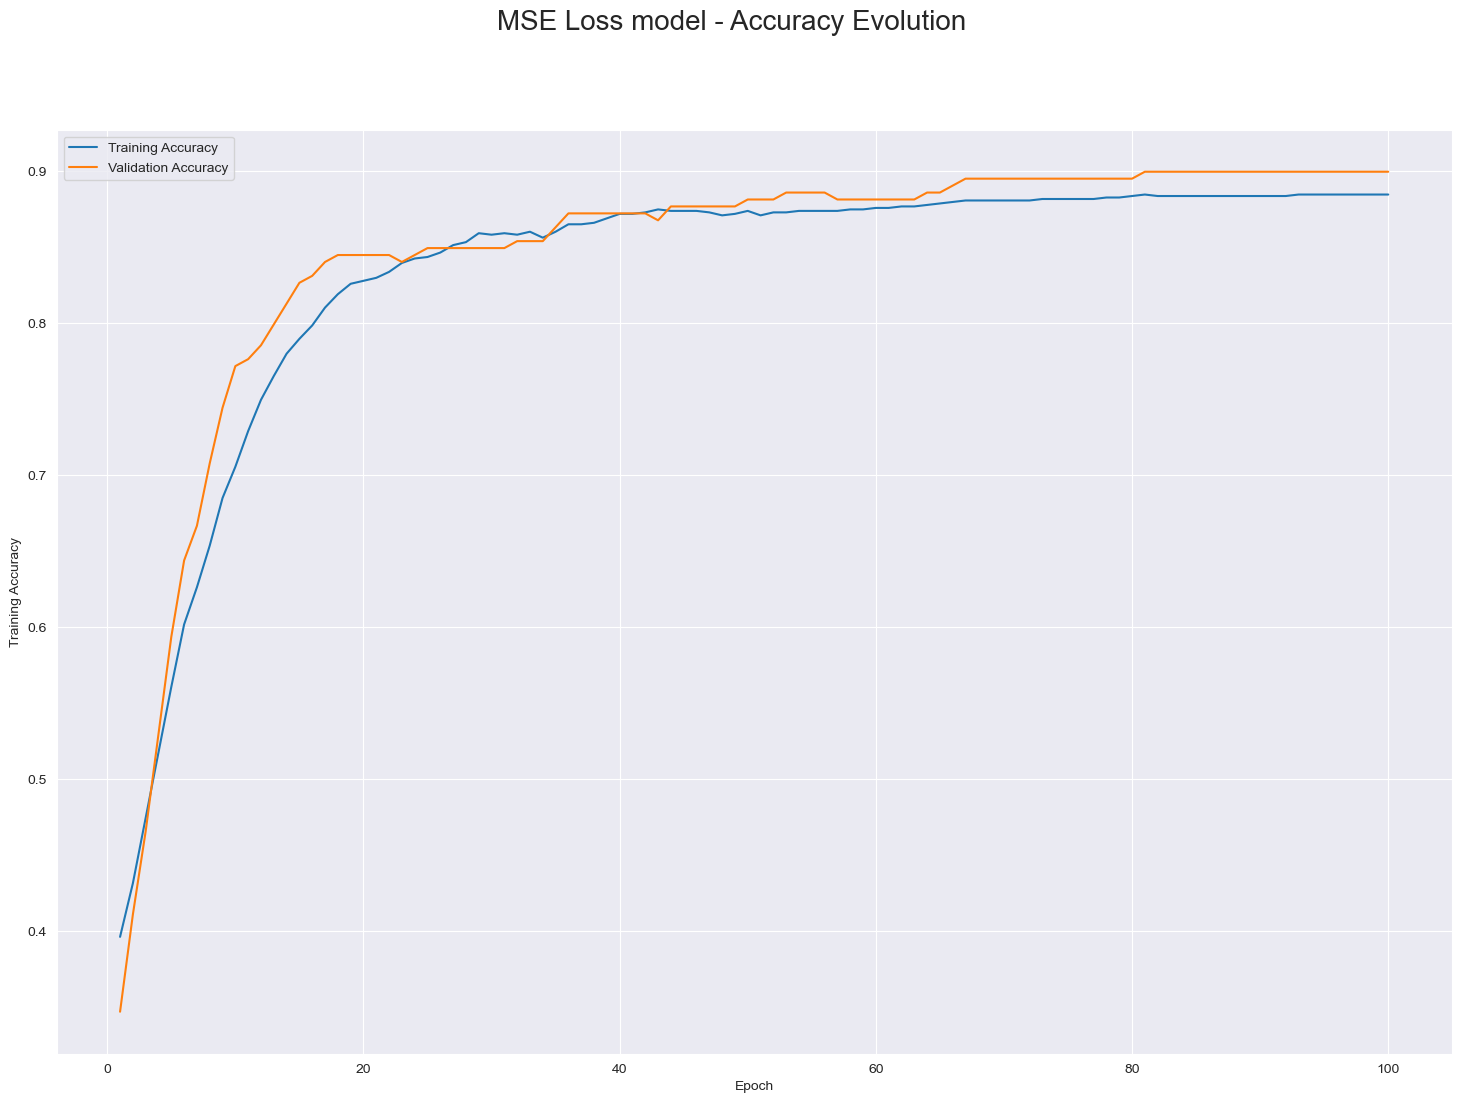

In [132]:
fig = plot_accuracy(history, "MSE Loss model - Accuracy Evolution")

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset. A list of most hyperparameters available keras: 

https://keras.io/api/layers/initializers/

https://keras.io/api/layers/activations/

https://keras.io/api/losses/

https://keras.io/api/optimizers/

## Validation on X_test

### Training on X_test

In [170]:
model = init_model()
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy', 'f1'])

In [171]:
with tf.device('/CPU:0'):
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, validation_data=(X_val, y_val))   

Epoch 1/100


ValueError: in user code:

    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1055, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1149, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 650, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/metrics/__init__.py", line 204, in get
        return deserialize(str(identifier))
    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/metrics/__init__.py", line 158, in deserialize
        return deserialize_keras_object(
    File "/Users/manulabricole/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/saving/legacy/serialization.py", line 543, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: 'f1'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


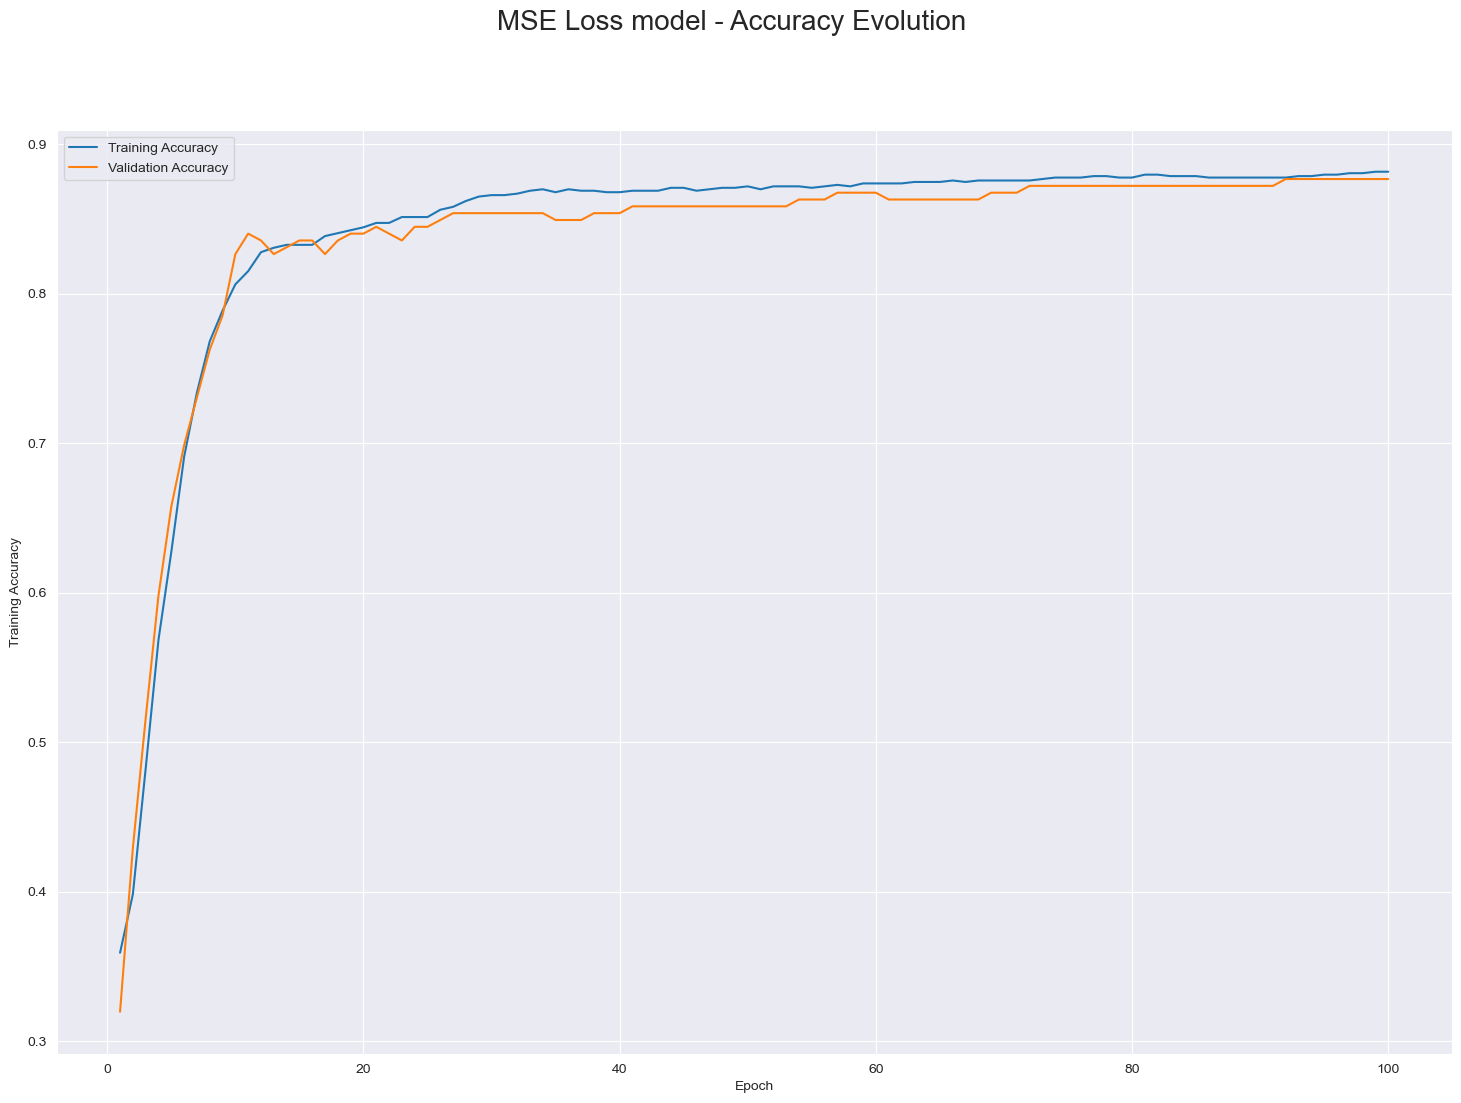

In [172]:
fig = plot_accuracy(history, "MSE Loss model - Accuracy Evolution")

In [173]:
y_test

In [174]:
y_test_predict = model.predict(X_test)
y_test_predict = np.round(y_test_predict)

In [175]:
accuracy = accuracy_score(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)

print(f"Accuracy score: {accuracy}")
print(f"Mean Squared Error (MSE): {mse}")